# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Carregar os dados
df = pd.read_csv("previsao_de_renda.csv")

# Exibir informações básicas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   index                  15000 non-null  int64  
 2   sexo                   15000 non-null  object 
 3   posse_de_veiculo       15000 non-null  bool   
 4   posse_de_imovel        15000 non-null  bool   
 5   qtd_filhos             15000 non-null  int64  
 6   tipo_renda             15000 non-null  object 
 7   educacao               15000 non-null  object 
 8   estado_civil           15000 non-null  object 
 9   tipo_residencia        15000 non-null  object 
 10  idade                  15000 non-null  int64  
 11  tempo_emprego          12466 non-null  float64
 12  qt_pessoas_residencia  15000 non-null  float64
 13  mau                    15000 non-null  bool   
 14  renda                  15000 non-null  float64
dtypes:

In [4]:
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [5]:
# Transformar em datetime
df['data_ref'] = pd.to_datetime(df['data_ref'])

#Verificar transformação
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   data_ref               15000 non-null  datetime64[ns]
 1   index                  15000 non-null  int64         
 2   sexo                   15000 non-null  object        
 3   posse_de_veiculo       15000 non-null  bool          
 4   posse_de_imovel        15000 non-null  bool          
 5   qtd_filhos             15000 non-null  int64         
 6   tipo_renda             15000 non-null  object        
 7   educacao               15000 non-null  object        
 8   estado_civil           15000 non-null  object        
 9   tipo_residencia        15000 non-null  object        
 10  idade                  15000 non-null  int64         
 11  tempo_emprego          12466 non-null  float64       
 12  qt_pessoas_residencia  15000 non-null  float64       
 13  m

In [12]:
# Variável qualitativa, por exemplo 'tipo_renda'
coluna_categ = 'tipo_renda'

# Agrupar por mês e categoria
dist = df.groupby([df['data_ref'].dt.to_period('M'), coluna_categ]).size().unstack()

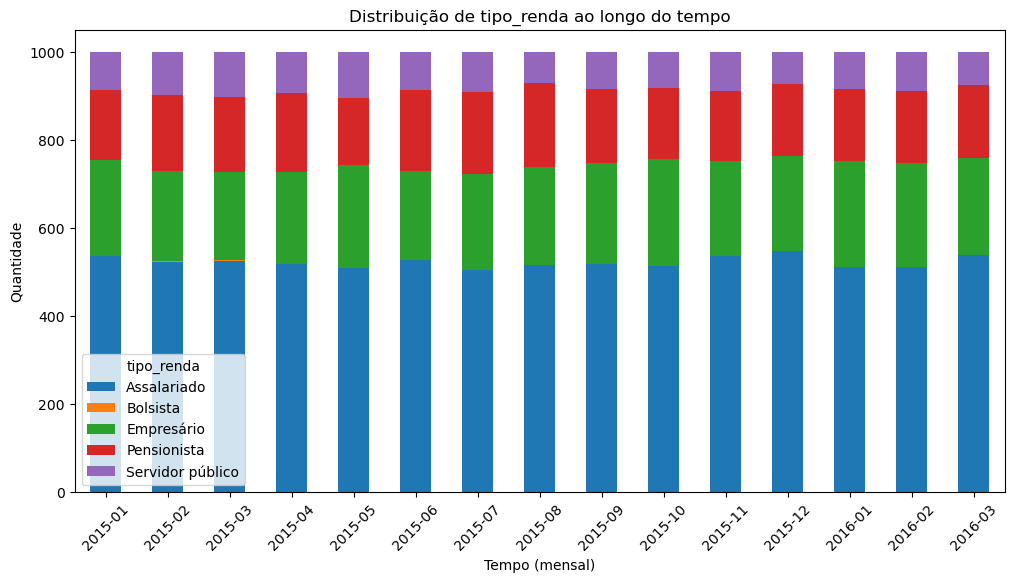

In [11]:
# Plotar gráfico de barras empilhadas
dist.plot(kind="bar", stacked=True, figsize=(12,6))

plt.title(f"Distribuição de {coluna_categ} ao longo do tempo")
plt.xlabel("Tempo (mensal)")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.legend(title=coluna_categ)
plt.show()

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

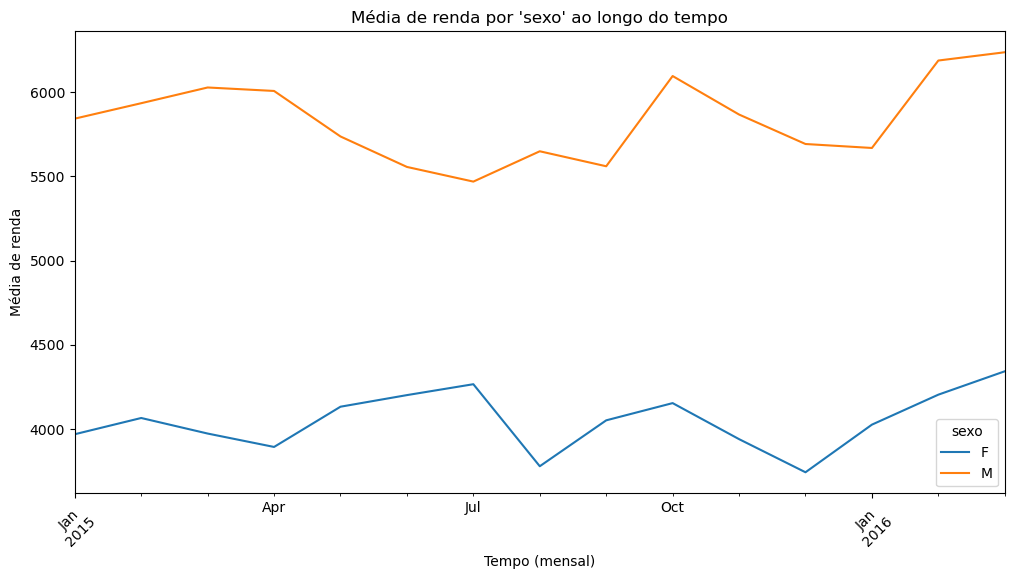

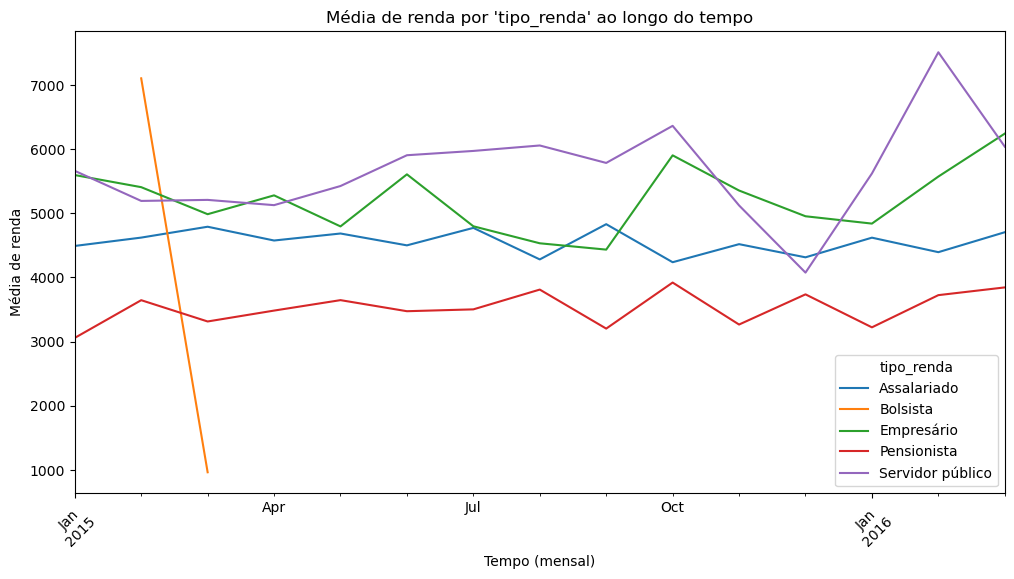

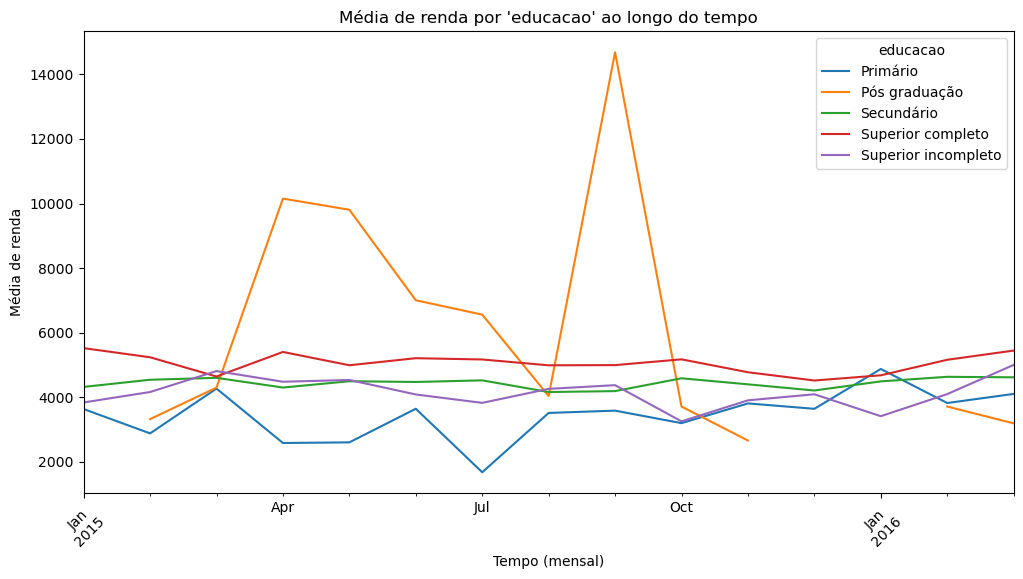

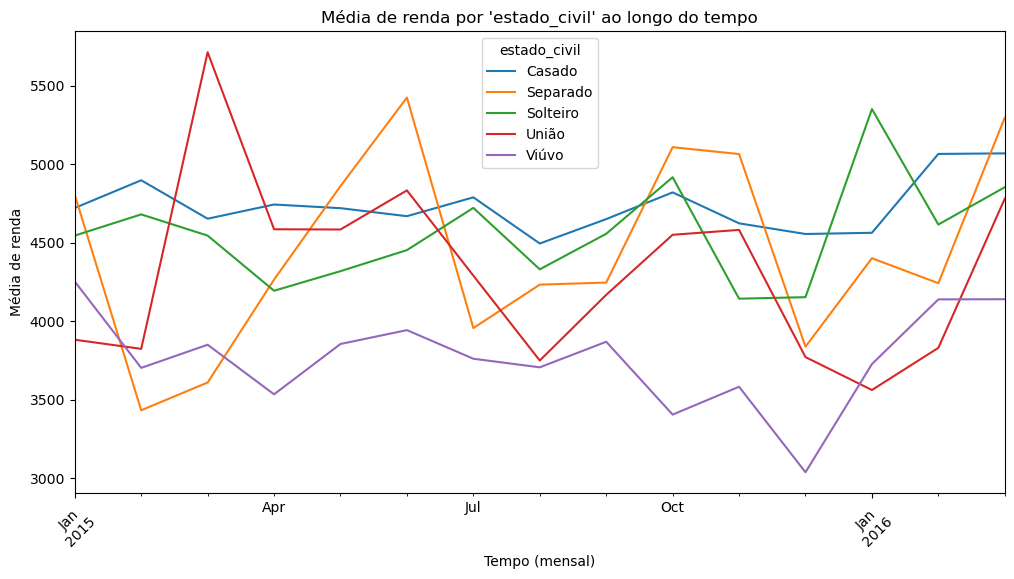

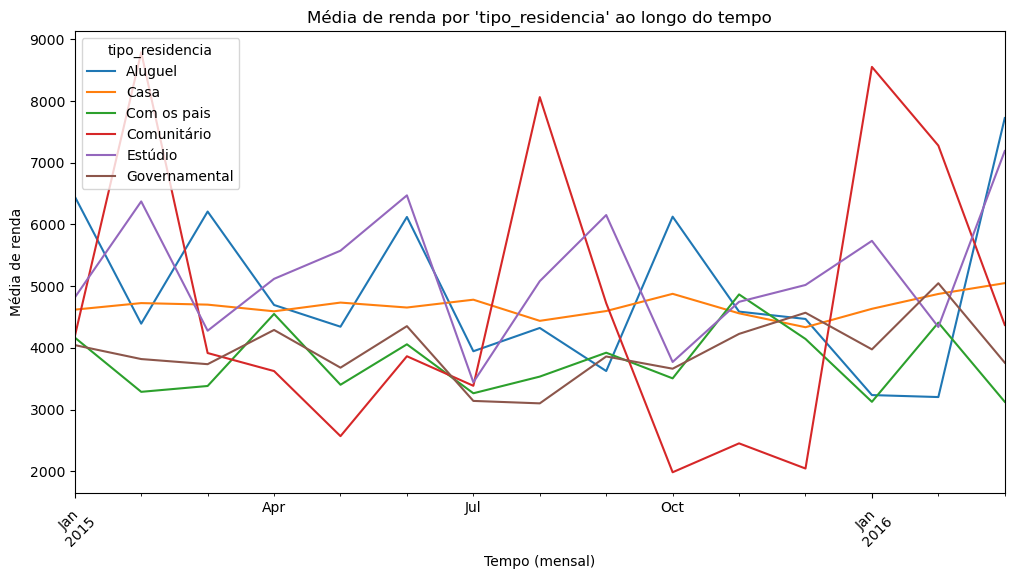

In [13]:
# Lista de variáveis qualitativas (tipos 'object' ou 'category')
qualitativas = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Variável numérica de interesse
variavel_numerica = 'renda'

# Loop para gerar gráficos
for col in qualitativas:
    # Agrupar por tempo (mensal) e nível da variável qualitativa
    medias = df.groupby([df['data_ref'].dt.to_period('M'), col])[variavel_numerica].mean().unstack()
    
    # Plot
    medias.plot(figsize=(12,6))
    plt.title(f"Média de {variavel_numerica} por '{col}' ao longo do tempo")
    plt.xlabel("Tempo (mensal)")
    plt.ylabel(f"Média de {variavel_numerica}")
    plt.xticks(rotation=45)
    plt.legend(title=col)
    plt.show()